# Notebook for plotting the penetration depth of K_L and N in KLM

In [1]:
import uproot as up
import matplotlib.pyplot as plot
import numpy as np

In [26]:
file_name_neutron = "/hpc/group/vossenlab/rck32/eic/work_eic/root_files/Clustering/December_30/n_1000events_3GeV_w_inner.edm4hep.root"
file_name_kaon = "/hpc/group/vossenlab/rck32/eic/work_eic/root_files/Clustering/December_30/K_L_1000events_3GeV_w_inner.edm4hep.root"

def get_rads(file_name,target_PDG):
    file = up.open(file_name)

    events = file["events"]

    MCParticles_endpoint_x = events["MCParticles/MCParticles.endpoint.x"].array(library = "numpy")
    MCParticles_endpoint_y = events["MCParticles/MCParticles.endpoint.y"].array(library = "numpy")
    PDG = events["MCParticles/MCParticles.PDG"].array(library = "numpy")
    status = events["MCParticles/MCParticles.generatorStatus"].array(library = "numpy")

    radial_distance = []
    for event_idx in range(len(PDG)):
        for particle_idx in range(len(PDG[event_idx])):
            if(status[event_idx][particle_idx] == 1):
                if(PDG[event_idx][particle_idx] == target_PDG):
                    radial_distance.append(pow(MCParticles_endpoint_x[event_idx][particle_idx].item() ** 2 + MCParticles_endpoint_y[event_idx][particle_idx].item() ** 2,0.5))
    radial_distance = np.array(radial_distance)
    return radial_distance[radial_distance < 5000]

In [27]:
n_rads = get_rads(file_name_neutron,target_PDG = 2112)
K_L_rads = get_rads(file_name_kaon,target_PDG = 130)

In [64]:
file_name_neutron = "/hpc/group/vossenlab/rck32/eic/work_eic/root_files/Clustering/December_30/n_1000events_3GeV_w_inner.edm4hep.root"
file_name_kaon = "/hpc/group/vossenlab/rck32/eic/work_eic/root_files/Clustering/December_30/K_L_1000events_3GeV_w_inner.edm4hep.root"

def get_rads_multi(file_name,target_PDG):
    file = up.open(file_name)

    events = file["events"]

    MCParticles_endpoint_x = events["MCParticles/MCParticles.endpoint.x"].array(library = "numpy")
    MCParticles_vertex_x = events["MCParticles/MCParticles.vertex.x"].array(library = "numpy")
    MCParticles_endpoint_y = events["MCParticles/MCParticles.endpoint.y"].array(library = "numpy")
    MCParticles_momentumAtEndpoint_x= events["MCParticles/MCParticles.momentumAtEndpoint.y"].array(library = "numpy")
    MCParticles_momentumAtEndpoint_y = events["MCParticles/MCParticles.momentumAtEndpoint.y"].array(library = "numpy")
    MCParticles_momentumAtEndpoint_z = events["MCParticles/MCParticles.momentumAtEndpoint.y"].array(library = "numpy")
    PDG = events["MCParticles/MCParticles.PDG"].array(library = "numpy")
    status = events["MCParticles/MCParticles.generatorStatus"].array(library = "numpy")

    radial_distance = np.zeros(len(PDG))
    primary_endpoint = np.zeros(len(PDG))
    end_momentum = np.zeros(len(PDG))
    for event_idx in range(len(PDG)):
        for particle_idx in range(len(PDG[event_idx])):
            if(PDG[event_idx][particle_idx] == target_PDG):
                dist = pow(MCParticles_endpoint_x[event_idx][particle_idx].item() ** 2 + MCParticles_endpoint_y[event_idx][particle_idx].item() ** 2,0.5)
                if(status[event_idx][particle_idx] == 1):
                    radial_distance[event_idx] = dist
                    primary_endpoint[event_idx] = MCParticles_endpoint_x[event_idx][particle_idx]
                    end_momentum[event_idx] = pow(MCParticles_momentumAtEndpoint_x[event_idx][particle_idx].item() ** 2 + MCParticles_momentumAtEndpoint_y[event_idx][particle_idx].item() ** 2,0.5)
                    if(end_momentum[event_idx] > 1):
                        print(event_idx)
                else:
                    current_vertex = MCParticles_vertex_x[event_idx][particle_idx]
                    if(primary_endpoint[event_idx] == current_vertex):
                        radial_distance[event_idx] = dist
    radial_distance = np.array(radial_distance)
    return radial_distance[radial_distance < 5000], end_momentum

In [68]:
n_rads_multi,n_pAtEnd = get_rads_multi(file_name_neutron,target_PDG = 2112)
K_L_rads_multi,K_L_pAtEnd = get_rads_multi(file_name_kaon,target_PDG = 130)

In [69]:
sum(n_pAtEnd)

np.float64(0.0)

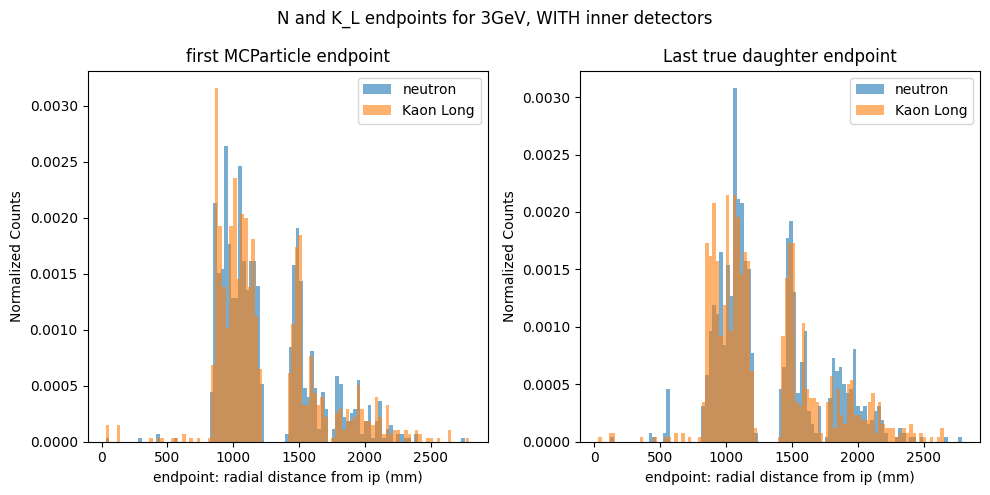

In [40]:
fig,axs = plot.subplots(1,2,figsize=(10,5))
axs[0].hist(n_rads,bins = 100,density = True,alpha = 0.6,label = "neutron");
axs[0].hist(K_L_rads,bins = 100,density = True, alpha = 0.6,label = "Kaon Long");
axs[0].set_xlabel("endpoint: radial distance from ip (mm)")
axs[0].set_ylabel("Normalized Counts")
axs[0].legend()
axs[0].set_title("first MCParticle endpoint")
axs[1].hist(n_rads_multi,bins = 100,density = True,alpha = 0.6,label = "neutron");
axs[1].hist(K_L_rads_multi,bins = 100,density = True, alpha = 0.6,label = "Kaon Long");
axs[1].set_xlabel("endpoint: radial distance from ip (mm)")
axs[1].set_ylabel("Normalized Counts")
axs[1].legend()
axs[1].set_title("Last true daughter endpoint")
fig.suptitle("N and K_L endpoints for 3GeV, WITH inner detectors")
fig.tight_layout()
# fig.savefig("plots/Clustering/NvsK_L/doublehisto_w_inner.pdf")

### Find % of particles that reach KLM

In [44]:
n_KLM_count = 0
K_L_KLM_count = 0

for i in range(len(n_rads_multi)):
    if(n_rads_multi[i] > 1713):
        n_KLM_count += 1
for i in range(len(K_L_rads_multi)):
    if(K_L_rads_multi[i] > 1713):
        K_L_KLM_count += 1

In [45]:
print(f"{n_KLM_count * 100 / len(n_rads_multi)}% of neutrons reach KLM\n{K_L_KLM_count * 100 / len(K_L_rads_multi)}% of K_L reach KLM")

18.993839835728952% of neutrons reach KLM
16.51560926485398% of K_L reach KLM
